In [1]:
import pandas as pd

import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import shapiro, kstest, normaltest,skew

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json

import warnings
warnings.filterwarnings('ignore')

C:\Users\Sairam\AppData\Local\Temp\ipykernel_3872\3879812312.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv("car_web_scraped_dataset.csv")
df

,name,year,miles,color,condition,price
0,Kia Forte,2022,"41,406 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$15,988"
1,Chevrolet Silverado 1500,2021,"15,138 miles","White exterior, Black interior","1 accident reported, 1 Owner","$38,008"
2,Toyota RAV4,2022,"32,879 miles","Silver exterior, Unknown interior","No accidents reported, 1 Owner","$24,988"
3,Honda Civic,2020,"37,190 miles","Blue exterior, Black interior","No accidents reported, 1 Owner","$18,998"
4,Honda Civic,2020,"27,496 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$19,498"
...,...,...,...,...,...,...
2835,Ford Escape,2013,"98,601 miles","Silver exterior, Unknown interior","2 accidents reported, 3 Owners","$8,995"
2836,Mercedes-Benz R-Class,2009,"120,694 miles","Black exterior, Black interior","1 accident reported, 3 Owners","$9,495"
2837,Mercedes-Benz GLC,2022,"27,894 miles","Gray exterior, Gray interior","No accidents reported, 2 Owners","$29,999"
2838,Honda CR-V,2021,"50,220 miles","Gray exterior, Unknown interior","No accidents reported, 1 Owner","$22,992"


In [14]:
# this dataset conains 2840 rows , 6 columns among which 5 are independent
# and 1 is dependent(price)# i.e 5 independent features and 1 target feature

In [3]:
df.shape

(2840, 6)

In [4]:
df.size

17040

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       2840 non-null   object
 1   year       2840 non-null   int64 
 2   miles      2840 non-null   object
 3   color      2840 non-null   object
 4   condition  2840 non-null   object
 5   price      2840 non-null   object
dtypes: int64(1), object(5)
memory usage: 133.3+ KB


In [6]:
df.describe()

,year
count,2840.000000
mean,2018.833803
std,3.557585
min,2000.000000
25%,2017.000000
50%,2020.000000
75%,2021.000000
max,2024.000000


In [19]:
# from above dataset contain onlt 1 column of integervalues and other are objrct

In [ ]:
#Problem statement
predict the price of used car depending upon its condition,year
miles and colour

### 2.data gathering

In [ ]:
df=pd.read_csv("car_web_scraped_dataset.csv")
df

In [ ]:
# name colur condition can be used for feature engeneering to creat new column
# more over mileand price need tobe cleaned so that they are integer

### data cleaning and feature engeneering

In [7]:
df_copy=df.copy().drop_duplicates()
df_copy

,name,year,miles,color,condition,price
0,Kia Forte,2022,"41,406 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$15,988"
1,Chevrolet Silverado 1500,2021,"15,138 miles","White exterior, Black interior","1 accident reported, 1 Owner","$38,008"
2,Toyota RAV4,2022,"32,879 miles","Silver exterior, Unknown interior","No accidents reported, 1 Owner","$24,988"
3,Honda Civic,2020,"37,190 miles","Blue exterior, Black interior","No accidents reported, 1 Owner","$18,998"
4,Honda Civic,2020,"27,496 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$19,498"
...,...,...,...,...,...,...
2835,Ford Escape,2013,"98,601 miles","Silver exterior, Unknown interior","2 accidents reported, 3 Owners","$8,995"
2836,Mercedes-Benz R-Class,2009,"120,694 miles","Black exterior, Black interior","1 accident reported, 3 Owners","$9,495"
2837,Mercedes-Benz GLC,2022,"27,894 miles","Gray exterior, Gray interior","No accidents reported, 2 Owners","$29,999"
2838,Honda CR-V,2021,"50,220 miles","Gray exterior, Unknown interior","No accidents reported, 1 Owner","$22,992"


In [ ]:
https://www.keybr.com/

In [ ]:
# fierst strip the$ sign
# and','convert values to integer

In [8]:
cleaned_price=[int(str(value).strip("$").replace(',',''))for value in df_copy['price'].values]

In [9]:
cleaned_price

[15988,
 38008,
 24988,
 18998,
 19498,
 21000,
 20998,
 18887,
 19498,
 17998,
 30998,
 20998,
 22597,
 29998,
 39998,
 21998,
 17998,
 17998,
 19598,
 18285,
 102167,
 26998,
 26839,
 27998,
 26518,
 19988,
 16488,
 29990,
 23998,
 20998,
 24498,
 16498,
 19998,
 20998,
 16998,
 43998,
 27798,
 20998,
 20998,
 23998,
 19998,
 17998,
 14998,
 20994,
 35037,
 15998,
 20998,
 23998,
 20222,
 20698,
 27998,
 15998,
 14998,
 21499,
 40998,
 14300,
 60800,
 24988,
 16998,
 21788,
 24498,
 16998,
 28998,
 26998,
 28998,
 33998,
 21670,
 15998,
 15998,
 22999,
 42762,
 12599,
 24998,
 25998,
 28998,
 17998,
 23998,
 16499,
 29333,
 16998,
 26989,
 32998,
 25998,
 39999,
 18481,
 26495,
 24998,
 15999,
 19998,
 35498,
 14999,
 35998,
 41998,
 8488,
 35998,
 13998,
 24575,
 28624,
 59930,
 32197,
 15049,
 17998,
 20998,
 13998,
 64998,
 20599,
 16998,
 18998,
 26965,
 53998,
 24998,
 17993,
 29795,
 14621,
 10498,
 39998,
 27555,
 21555,
 45999,
 17000,
 29000,
 22995,
 31997,
 45828,
 11995,


In [10]:
miles=[int(str(m).replace('miles','').replace(',','').strip())for m in df_copy['miles'].values]

In [11]:
miles

[41406,
 15138,
 32879,
 37190,
 27496,
 29026,
 4148,
 57602,
 50240,
 56766,
 44099,
 11140,
 8506,
 38760,
 27002,
 22850,
 68660,
 55079,
 64337,
 83424,
 21991,
 61318,
 36064,
 57707,
 38981,
 33632,
 51560,
 18769,
 74031,
 16112,
 17123,
 71406,
 73428,
 28897,
 60478,
 44880,
 23215,
 24044,
 50950,
 36853,
 32668,
 50142,
 91969,
 74525,
 16462,
 86935,
 120296,
 29063,
 33167,
 11593,
 58038,
 78479,
 122285,
 87121,
 25671,
 107676,
 131,
 38375,
 76825,
 58575,
 34447,
 100359,
 42840,
 7415,
 31907,
 34656,
 97438,
 115951,
 108281,
 67648,
 21413,
 102479,
 67086,
 2414,
 51617,
 78006,
 82472,
 36517,
 62007,
 50045,
 30202,
 12093,
 46904,
 22998,
 84324,
 5335,
 13411,
 53961,
 126749,
 30252,
 37385,
 37965,
 27642,
 87358,
 19914,
 89932,
 19140,
 66896,
 17122,
 41233,
 95016,
 88063,
 70468,
 95775,
 24935,
 63819,
 67207,
 48616,
 39860,
 60028,
 23724,
 58885,
 18887,
 77896,
 102507,
 15600,
 48925,
 97372,
 2885,
 44630,
 47492,
 66478,
 26469,
 10608,
 83650,

In [12]:
temp_name=df_copy['name'].copy()
temp_name=[str(name).split(" ",maxsplit=1)for name in temp_name.values]
make=[arr[0]for arr in temp_name]
len(make)

2312

In [13]:
make

['Kia',
 'Chevrolet',
 'Toyota',
 'Honda',
 'Honda',
 'Honda',
 'Honda',
 'Mercedes-Benz',
 'Honda',
 'BMW',
 'Jeep',
 'Honda',
 'Honda',
 'Mercedes-Benz',
 'Porsche',
 'Honda',
 'Buick',
 'BMW',
 'Jeep',
 'Mercedes-Benz',
 'Porsche',
 'Honda',
 'Mercedes-Benz',
 'BMW',
 'Mercedes-Benz',
 'Kia',
 'Nissan',
 'Mercedes-Benz',
 'Honda',
 'Honda',
 'Honda',
 'Honda',
 'Chrysler',
 'Volkswagen',
 'BMW',
 'Porsche',
 'Honda',
 'Nissan',
 'Volkswagen',
 'Toyota',
 'Chevrolet',
 'Volkswagen',
 'Chevrolet',
 'Land',
 'Toyota',
 'Kia',
 'Dodge',
 'Jeep',
 'Toyota',
 'Honda',
 'Jeep',
 'BMW',
 'Honda',
 'Toyota',
 'Toyota',
 'Ford',
 'Ford',
 'Toyota',
 'Honda',
 'Honda',
 'Honda',
 'Toyota',
 'Honda',
 'Nissan',
 'INFINITI',
 'Volvo',
 'Honda',
 'Ford',
 'Chevrolet',
 'Mercedes-Benz',
 'Mercedes-Benz',
 'Chevrolet',
 'Jeep',
 'Honda',
 'Honda',
 'BMW',
 'Jeep',
 'Chevrolet',
 'Mercedes-Benz',
 'Nissan',
 'Volvo',
 'BMW',
 'Mercedes-Benz',
 'Mercedes-Benz',
 'Ford',
 'Ford',
 'Toyota',
 'Mitsubis

In [14]:
model=[arr[1] for arr in temp_name]

In [15]:
model

['Forte',
 'Silverado 1500',
 'RAV4',
 'Civic',
 'Civic',
 'Civic',
 'Accord',
 'GLC',
 'Civic',
 '5 Series',
 'Wrangler',
 'Civic',
 'Civic',
 'GLC',
 'Macan',
 'Civic',
 'Cascada',
 '3 Series',
 'Grand Cherokee',
 'C-Class',
 'Cayenne',
 'Odyssey',
 'GLC',
 '7 Series',
 'GLC',
 'K5',
 'Kicks',
 'C-Class',
 'CR-V',
 'Civic',
 'CR-V',
 'Civic',
 'Pacifica',
 'Tiguan',
 '3 Series',
 'Cayenne',
 'CR-V',
 'Sentra',
 'Tiguan',
 'Camry',
 'Malibu',
 'Tiguan',
 'Volt',
 'Rover Range Rover Sport',
 'Highlander',
 'Optima',
 'Charger',
 'Grand Cherokee',
 'Corolla',
 'Civic',
 'Wrangler',
 '3 Series',
 'Odyssey',
 'Tacoma',
 '4Runner',
 'Mustang',
 'F-150',
 'RAV4',
 'CR-V',
 'Accord',
 'Accord',
 'Camry',
 'Pilot',
 'Rogue Sport',
 'QX60',
 'XC60',
 'Pilot',
 'Explorer',
 'Equinox',
 'GLC',
 'GLE',
 'Volt',
 'Grand Cherokee',
 'Accord',
 'Odyssey',
 '3 Series',
 'Wrangler',
 'Malibu',
 'S-Class',
 'Sentra',
 'S90',
 'X3',
 'C-Class',
 'GLS',
 'Mustang',
 'Bronco Sport',
 'Camry',
 'Outlander 

In [16]:
len(model)

2312

In [32]:
colors

UsageError: %colors: you must specify a color scheme. See '%colors?'


In [17]:
colors=[str(color).split(",") for color in df_copy['color'].values]

In [18]:
colors

[['Gray exterior', ' Black interior'],
 ['White exterior', ' Black interior'],
 ['Silver exterior', ' Unknown interior'],
 ['Blue exterior', ' Black interior'],
 ['Black exterior', ' Black interior'],
 ['Silver exterior', ' Black interior'],
 ['Black exterior', ' Black interior'],
 ['Blue exterior', ' Unknown interior'],
 ['Black exterior', ' Black interior'],
 ['White exterior', ' Black interior'],
 ['Gray exterior', ' Black interior'],
 ['Black exterior', ' Black interior'],
 ['Gray exterior', ' Black interior'],
 ['Black exterior', ' Black interior'],
 ['White exterior', ' Black interior'],
 ['White exterior', ' Black interior'],
 ['White exterior', ' Beige interior'],
 ['White exterior', ' Black interior'],
 ['White exterior', ' Black interior'],
 ['White exterior', ' Black interior'],
 ['Silver exterior', ' Black interior'],
 ['Black exterior', ' Brown interior'],
 ['White exterior', ' Unknown interior'],
 ['White exterior', ' Black interior'],
 ['Black exterior', ' Black interior

In [19]:
exterior_color=[str(color[0]).replace('exterior','').strip()for color in colors]

In [20]:
len(exterior_color)

2312

In [21]:
interior_color=[str(color[1]).replace('interior','').strip()for color in colors]

In [22]:
len(interior_color)

2312

In [ ]:
# now, let's deal with the condition variable that tells us important 
# information about the number of accidents and the amount of owners

In [23]:
conditions=[str(condition).split(",")for condition in df_copy['condition'].values]
conditions

[['No accidents reported', ' 1 Owner'],
 ['1 accident reported', ' 1 Owner'],
 ['No accidents reported', ' 1 Owner'],
 ['No accidents reported', ' 1 Owner'],
 ['No accidents reported', ' 1 Owner'],
 ['1 accident reported', ' 1 Owner'],
 ['1 accident reported', ' 1 Owner'],
 ['1 accident reported', ' 3 Owners'],
 ['1 accident reported', ' 1 Owner'],
 ['No accidents reported', ' 3 Owners'],
 ['No accidents reported', ' 2 Owners'],
 ['No accidents reported', ' 1 Owner'],
 ['No accidents reported', ' 1 Owner'],
 ['No accidents reported', ' 1 Owner'],
 ['No accidents reported', ' 2 Owners'],
 ['No accidents reported', ' 1 Owner'],
 ['1 accident reported', ' 2 Owners'],
 ['No accidents reported', ' 2 Owners'],
 ['No accidents reported', ' 2 Owners'],
 ['1 accident reported', ' 2 Owners'],
 ['No accidents reported', ' 1 Owner'],
 ['No accidents reported', ' 1 Owner'],
 ['1 accident reported', ' 1 Owner'],
 ['No accidents reported', ' 3 Owners'],
 ['1 accident reported', ' 1 Owner'],
 ['No acc

In [ ]:
now lets mke accident in int

In [24]:
accidents=[int(str(condition[0]).replace('No','0').replace('accident reported','').replace('accidents reported','').strip())
              for condition in conditions]
len(accidents)

2312

In [25]:
owners=[int(str(condition[1]).replace('Owners','').replace('Owner','').strip())
        for condition in conditions]
len(owners)

2312

In [26]:
print(
    len(make), 
    len(model),
    len(df_copy['year'].copy()),
    len(miles),
    len(exterior_color),
    len(interior_color),
    len(accidents),
    len(owners),
    len(cleaned_price))

2312 2312 2312 2312 2312 2312 2312 2312 2312


In [ ]:
# so all are same lenth 

In [ ]:
# so we wil make clean dataframe

In [27]:
year=df_copy['year']

In [28]:
df_clean=pd.DataFrame({
                         'make':make,
                         'model':model,
                         "year":year,
                         "miles": miles,
                         "exterior-color": exterior_color,
                         "interior-color": interior_color,
                         "accidents-reported": accidents,
                          "num-of-owners": owners,
                          "price": cleaned_price
                        })
df_clean

,make,model,year,miles,exterior-color,interior-color,accidents-reported,num-of-owners,price
0,Kia,Forte,2022,41406,Gray,Black,0,1,15988
1,Chevrolet,Silverado 1500,2021,15138,White,Black,1,1,38008
2,Toyota,RAV4,2022,32879,Silver,Unknown,0,1,24988
3,Honda,Civic,2020,37190,Blue,Black,0,1,18998
4,Honda,Civic,2020,27496,Black,Black,0,1,19498
...,...,...,...,...,...,...,...,...,...
2835,Ford,Escape,2013,98601,Silver,Unknown,2,3,8995
2836,Mercedes-Benz,R-Class,2009,120694,Black,Black,1,3,9495
2837,Mercedes-Benz,GLC,2022,27894,Gray,Gray,0,2,29999
2838,Honda,CR-V,2021,50220,Gray,Unknown,0,1,22992


In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2312 entries, 0 to 2839
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   make                2312 non-null   object
 1   model               2312 non-null   object
 2   year                2312 non-null   int64 
 3   miles               2312 non-null   int64 
 4   exterior-color      2312 non-null   object
 5   interior-color      2312 non-null   object
 6   accidents-reported  2312 non-null   int64 
 7   num-of-owners       2312 non-null   int64 
 8   price               2312 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 180.6+ KB


In [ ]:
# look at the allunique values in our dataset

In [30]:
print(
      'make:{}'.format(df_clean['make'].unique()),
      'model:{}'.format(df_clean['model'].unique()),
      'year:{}'.format(df_clean['year'].unique()),
      'miles:{}'.format(df_clean['miles'].aggregate(func=['mean'])),
      'exterior-color:{}'.format(df_clean['exterior-color'].unique()),
      'interior-color:{}'.format(df_clean['exterior-color'].unique()), 
      'accidents-reported:{}'.format(df_clean['accidents-reported'].unique()),
      'num-of-owners:{}'.format(df_clean['num-of-owners'].unique()),
      'price:{}'.format(df_clean['price'].aggregate(func=['mean'])),
    sep="\n\n"
    )                  

make:['Kia' 'Chevrolet' 'Toyota' 'Honda' 'Mercedes-Benz' 'BMW' 'Jeep' 'Porsche'
 'Buick' 'Nissan' 'Chrysler' 'Volkswagen' 'Land' 'Dodge' 'Ford' 'INFINITI'
 'Volvo' 'Mitsubishi' 'Lexus' 'Hyundai' 'Mazda' 'Acura' 'Maserati'
 'Subaru' 'Audi' 'Jaguar' 'GMC' 'Cadillac' 'Ram' 'Alfa' 'FIAT' 'Lincoln'
 'Aston' 'MINI' 'Genesis' 'Karma' 'Scion' 'McLaren' 'Rolls-Royce'
 'Bentley' 'Pontiac' 'Saturn']

model:['Forte' 'Silverado 1500' 'RAV4' 'Civic' 'Accord' 'GLC' '5 Series'
 'Wrangler' 'Macan' 'Cascada' '3 Series' 'Grand Cherokee' 'C-Class'
 'Cayenne' 'Odyssey' '7 Series' 'K5' 'Kicks' 'CR-V' 'Pacifica' 'Tiguan'
 'Sentra' 'Camry' 'Malibu' 'Volt' 'Rover Range Rover Sport' 'Highlander'
 'Optima' 'Charger' 'Corolla' 'Tacoma' '4Runner' 'Mustang' 'F-150' 'Pilot'
 'Rogue Sport' 'QX60' 'XC60' 'Explorer' 'Equinox' 'GLE' 'S-Class' 'S90'
 'X3' 'GLS' 'Bronco Sport' 'Outlander Sport' 'XC90' 'RX' 'E-Class' 'Versa'
 'Edge' '4 Series' 'Sonata' 'X4 M' '300' 'Fusion' 'Mazda3' 'GLA' 'LX'
 'Blazer' 'Altima' 'CX-9' 'S2

In [31]:
df_clean.describe()

,year,miles,accidents-reported,num-of-owners,price
count,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000
mean,2018.873702,49896.590398,0.281142,1.504325,25841.419983
std,3.466794,36287.386865,0.593947,0.852607,13880.328572
min,2000.000000,25.000000,0.000000,0.000000,4395.000000
25%,2017.000000,23590.250000,0.000000,1.000000,17991.000000
50%,2020.000000,40703.000000,0.000000,1.000000,22999.000000
75%,2021.000000,69360.250000,0.000000,2.000000,30999.250000
max,2024.000000,307292.000000,5.000000,8.000000,252900.000000


In [ ]:
# so now we will import mathplot lib seaborn for visualiztion

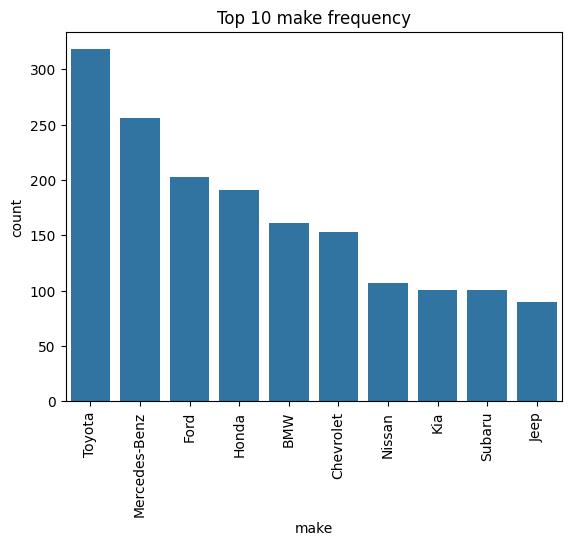

In [32]:
sns.barplot(
    x='make',
    y='count',
    data=df_clean['make'].value_counts().to_frame().head(10).reset_index()
)
plt.xticks(rotation=90);
plt.title("Top 10 make frequency");

In [ ]:
# find out which variable has more impact on the price

In [ ]:
# a seaborn bargraph with each bar being a car make and the y-axis 
# representing the avg price of a car of that make

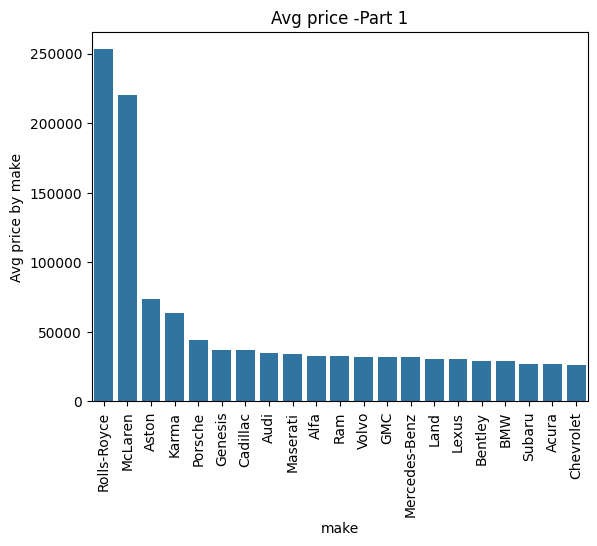

In [33]:
sns.barplot(
            x='make',
            y='price',
            data=df_clean.groupby('make')['price'].mean().to_frame().sort_values(by='price',ascending=False).head(21).reset_index()
            )
plt.ylabel('Avg price by make');
plt.xticks(rotation=90);
plt.title('Avg price -Part 1');   

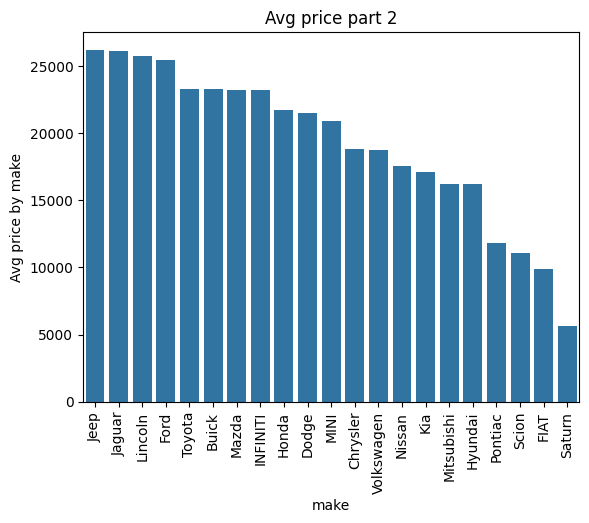

In [34]:
sns.barplot(
            x='make',
            y='price',
            data=df_clean.groupby('make')['price'].mean().to_frame().sort_values(by='price',ascending=False).tail(21).reset_index()
)
plt.title('Avg price part 2');
plt.xticks(rotation=90);
plt.ylabel('Avg price by make');   

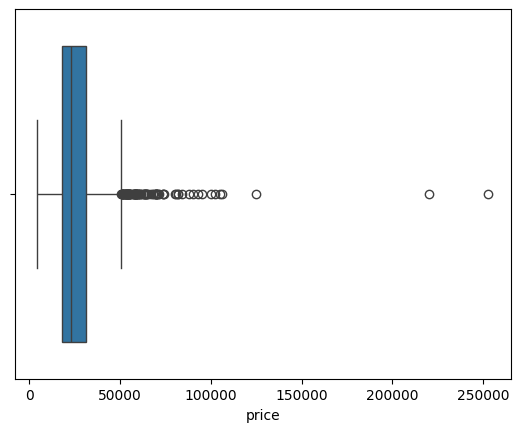

count      2312.000000
mean      25841.419983
std       13880.328572
min        4395.000000
25%       17991.000000
50%       22999.000000
75%       30999.250000
max      252900.000000
Name: price, dtype: float64


In [35]:
box=sns.boxplot(
    x=df_clean['price'].sort_values()
)
plt.show()
print(df_clean['price'].sort_values().describe())

In [ ]:
# q1 and q3 using this we can remove outliers
# q1=17991
# q3=30999

In [ ]:
# groupby accidents reported and aggregate price by using mean

Text(0.5, 1.0, 'mean price by accidents reported')

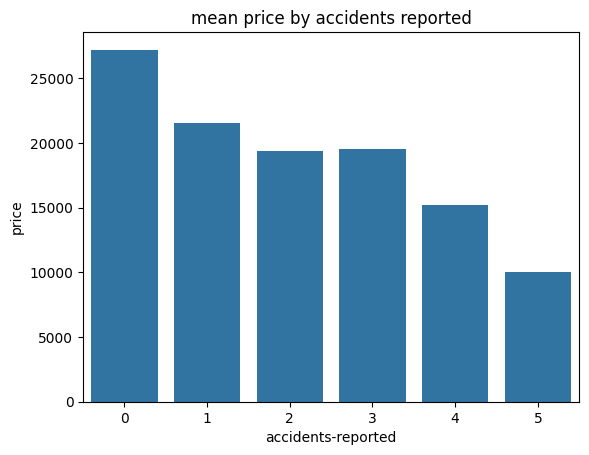

In [36]:
box=sns.barplot(
    x='accidents-reported',
    y='price',
    data=df_clean.groupby('accidents-reported')['price'].mean().to_frame().reset_index()
)
plt.title('mean price by accidents reported')

In [ ]:
IQR(inter quantile range)=q3-q1
lower=q1-(1.5*IQR)
upper=q3+(1.5*IQR)

In [37]:
def return_lower_upper_tails(q1,q3):
    IQR=q3-q1
    lower=q1-(1.5*IQR)
    upper=q3+(1.5*IQR)
    return lower,upper

In [38]:
df_removed_outliers_by_price=df_clean.copy()

In [39]:
lower_tail,upper_tail=return_lower_upper_tails(q1=17991,q3=30999.25)

In [40]:
lower_tail

-1521.375

In [41]:
upper_tail

50511.625